<a href="https://colab.research.google.com/github/Oleksandr190378/data-computing/blob/main/Hm_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


data_2d

In [3]:
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/data_2d.csv')
df.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [ ]:
df.columns

Index(['0.000000000000000000e+00', '-7.687164597386728637e-01',
       '4.608603078297135447e-01'],
      dtype='object')

In [4]:
df = df.drop(['0.000000000000000000e+00'], axis=1)

In [5]:
df.rename(columns={'-7.687164597386728637e-01': 'feature_1', '4.608603078297135447e-01': 'feature_2'}, inplace=True)
df.head()

,feature_1,feature_2
0,2.687848,2.366961
1,-0.201379,0.470430
2,0.608496,1.225400
3,-0.082282,1.137218
4,2.083069,2.694482


In [ ]:
df.isna().sum()

feature_1    0
feature_2    0
dtype: int64

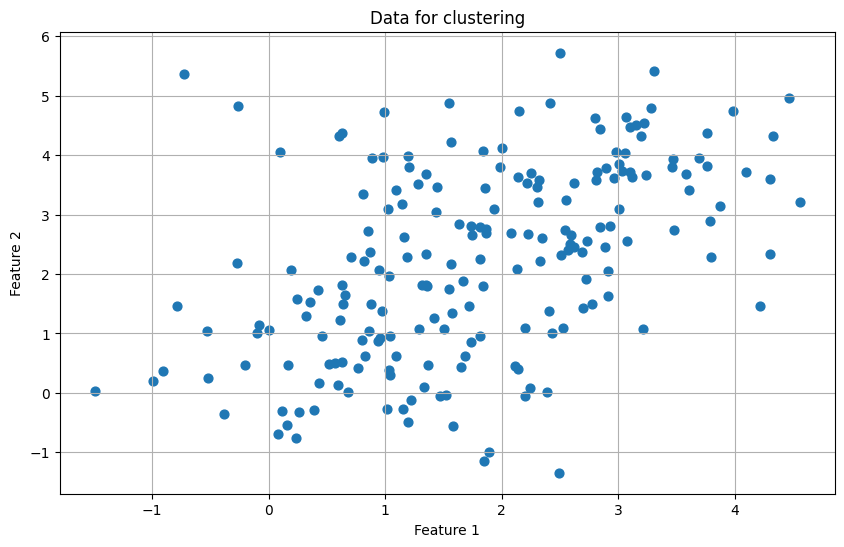

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['feature_1'], df['feature_2'], s=40)
plt.title('Data for clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=2)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

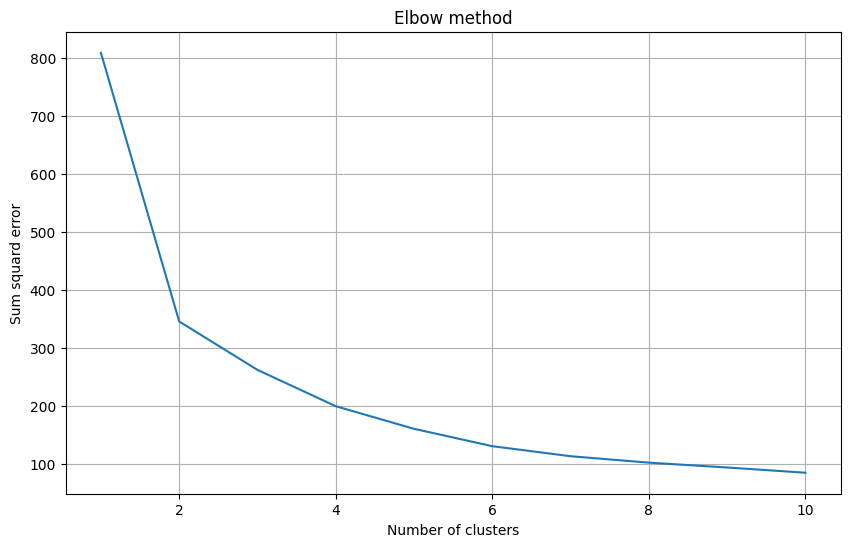

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum squard error')
plt.grid()
plt.show()

In [9]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=2)
pred_y = kmeans.fit_predict(df)
centers = kmeans.cluster_centers_
centers

array([[2.46540572, 3.48660748],
       [0.99657712, 0.80580517]])

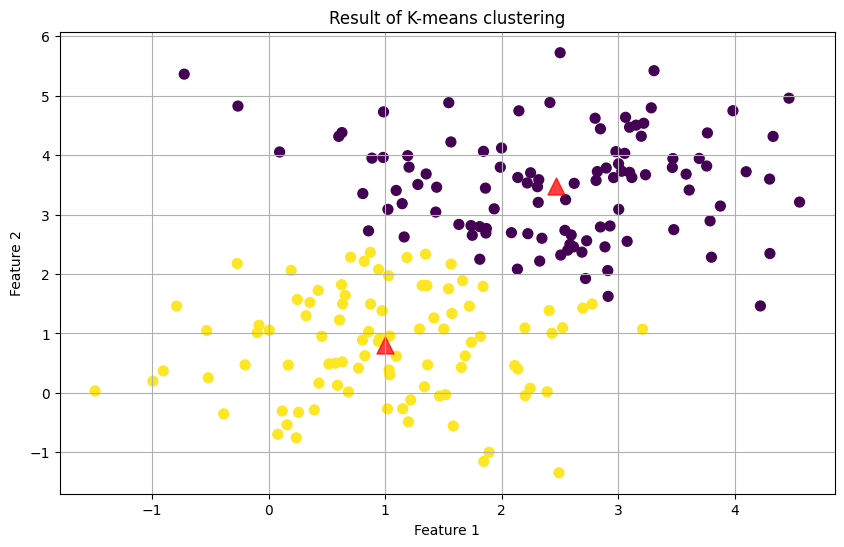

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['feature_1'], df['feature_2'], c=pred_y, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='^', alpha=0.75)
plt.title('Result of K-means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

mnist

In [11]:
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/mnist.csv')
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

7        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.663    int64
0.664    int64
0.665    int64
0.666    int64
0.667    int64
Length: 785, dtype: object

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [13]:

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"The singular values : {pca.singular_values_}")


Explained variance ratio: [0.07297391 0.05103241]
The singular values : [144.82559865 121.11126523]


In [14]:
df_pca = pd.DataFrame(df_pca, columns=['feature_1', 'feature_2'])

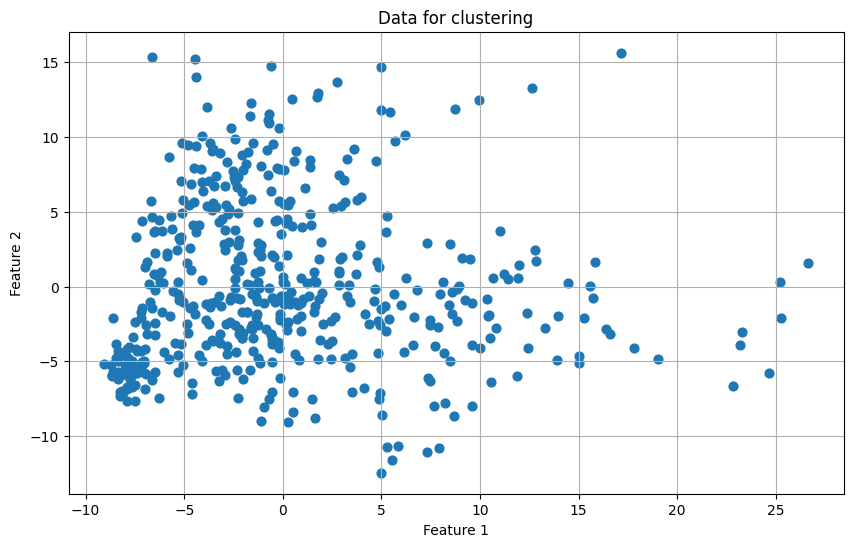

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['feature_1'], df_pca['feature_2'], s=40)
plt.title('Data for clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

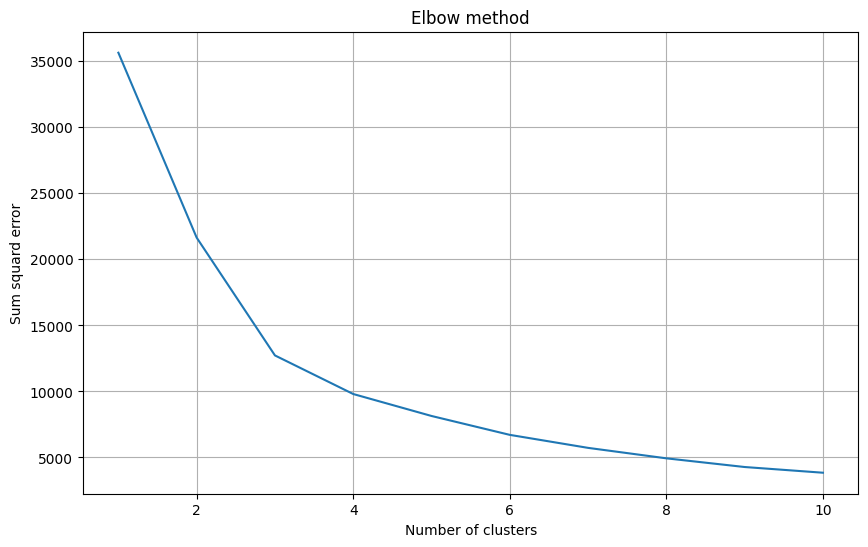

In [16]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=2)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum squard error')
plt.grid()
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_pca)
centers = kmeans.cluster_centers_
centers

array([[-3.51915477, -3.12330172],
       [-1.18788087,  6.48952928],
       [ 9.84669357, -2.64913738]])

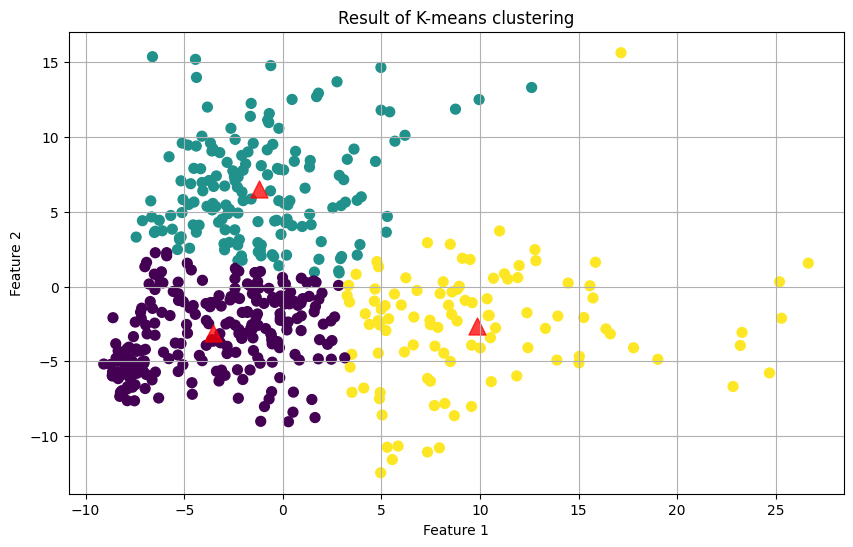

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['feature_1'], df_pca['feature_2'], c=pred_y, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, marker='^', alpha=0.75)
plt.title('Result of K-means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()